<a href="https://colab.research.google.com/github/visiont3lab/data-visualization/blob/master/courses/dashboard/Seaborn_Ploty_Basic_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn/Plotly Analisi dataset e presentazione web usando Dash



## Importiamo le librerie

In [0]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

## Importiamo i dataset

In [0]:
# Dati andamento nazionalehttps://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv
df_nazionale = pd.read_csv("")
df_nazionale["data"] = pd.to_datetime(df_nazionale["data"]).dt.date

# Dati regionali
df_regioni = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")
df_regioni["data"] = pd.to_datetime(df_regioni["data"]).dt.date

# Dati provinciali
df_province = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df_province["data"] = pd.to_datetime(df_province["data"]).dt.date

## Analizziamo l'andamento nazionale

In [0]:
df_nazionale.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2,2020-02-26,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
3,2020-02-27,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
4,2020-02-28,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN


### Plotly figure object

In [0]:
# https://plotly.com/python/line-charts/
# lines,  markers, line+martkers
# https://plotly.com/python/creating-and-updating-figures/
# https://plotly.com/python/reference/#layout-
# https://pythonbasics.org/plotly/
# https://plotly.com/python/

# Plolty notebook tutorial https://plotly.com/python/ipython-notebook-tutorial/
dt = df_nazionale

fig_plotly = go.Figure()
fig_plotly.add_trace(go.Scatter(x=dt["data"], y=dt["totale_casi"],
                    mode='lines+markers',
                    name='totale_casi'))
fig_plotly.add_trace(go.Scatter(x=dt["data"], y=dt["deceduti"],
                    mode='lines+markers',
                    name='deceduti'))
fig_plotly.add_trace(go.Scatter(x=dt["data"], y=dt["totale_positivi"],
                    mode='lines+markers',
                    name='totale_positivi'))
fig_plotly.update_layout(
    hovermode = "x",
    paper_bgcolor = "rgb(0,0,0)" ,
    plot_bgcolor = "rgb(10,10,10)" , 
    title=dict(
        x = 0.5,
        text = "Andamento Italia COVID 19",
        font=dict(
            size = 40,
            color = "rgb(255,255,255)"
        )
    )
)

'''
fig_plotly.layout.paper_bgcolor = "rgb(0,0,0)" 
fig_plotly.layout.font.size = 20
fig_plotly.layout.title.text = "Andamento Italia COVID 19"
fig_plotly.layout.title.x = 0.5
fig_plotly.layout.titlefont.size = 40
fig_plotly.layout.title.font.color = "rgb(255,255,255)"
fig_plotly.layout.plot_bgcolor = "rgb(10,10,10)" 
'''
fig_plotly.show()

In [0]:
data = [
    go.Scatter(x=dt["data"], y=dt["totale_casi"],
                    mode='lines+markers',
                    name='totale_casi'),
    go.Scatter(x=dt["data"], y=dt["deceduti"],
                    mode='lines+markers',
                    name='deceduti'),
    go.Scatter(x=dt["data"], y=dt["totale_positivi"],
                    mode='lines+markers',
                    name='totale_positivi'),
]


layout = go.Layout(
    hovermode = "x",
    paper_bgcolor = "rgb(0,0,0)" ,
    plot_bgcolor = "rgb(10,10,10)" , 
    title=dict(
        x = 0.5,
        text = "Andamento Italia COVID 19",
        font=dict(
            size = 40,
            color = "rgb(255,255,255)"
        )
    )
)

fig = dict(data=data, layout=layout)
pio.show(fig)

### Crea lo stesso grafico in seaborn

In [0]:
df_nazionale = df_nazionale.drop(columns=["stato", "note_it", "note_en"])
df_nazionale.head()

KeyError: ignored

In [0]:
df_nazionale_tidy = df_nazionale.melt('data', var_name='cols',  value_name='vals')
df_nazionale_tidy.head()

,data,cols,vals
0,2020-02-24,ricoverati_con_sintomi,101
1,2020-02-25,ricoverati_con_sintomi,114
2,2020-02-26,ricoverati_con_sintomi,128
3,2020-02-27,ricoverati_con_sintomi,248
4,2020-02-28,ricoverati_con_sintomi,345


In [0]:
sns.set()

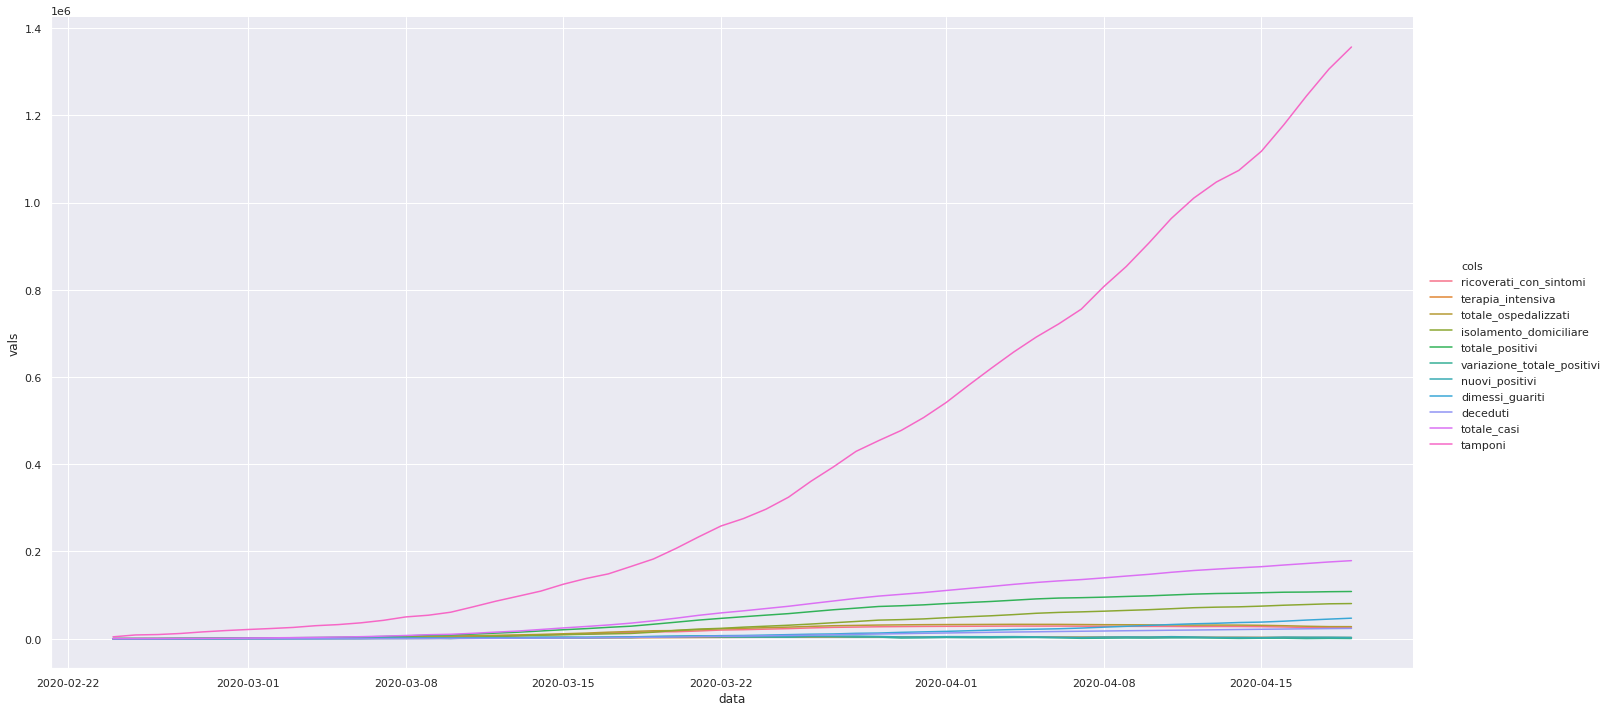

In [0]:
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html_
fig_seaborn = sns.relplot(x="data", y="vals", hue="cols" ,data=df_nazionale_tidy, kind="line", height=10, aspect=2)
fig_seaborn.savefig("image.png", )

## Crea una dashboard usando dash

In [0]:
!pip install dash flask_ngrok

In [0]:
import os
directory = "assets/images/"
if not os.path.exists(directory):
    os.makedirs(directory)

In [0]:
%%writefile assets/typography.css
body {
    padding: 20px 300px 0px 300px;
    margin : 0px 0px 0px  0px;
    /*padding : 0px 0px 0px 0px;*/
    background-color: black;
}

Overwriting assets/typography.css


In [0]:
fig_seaborn.savefig("assets/images/fig_static.png", transparent=True )




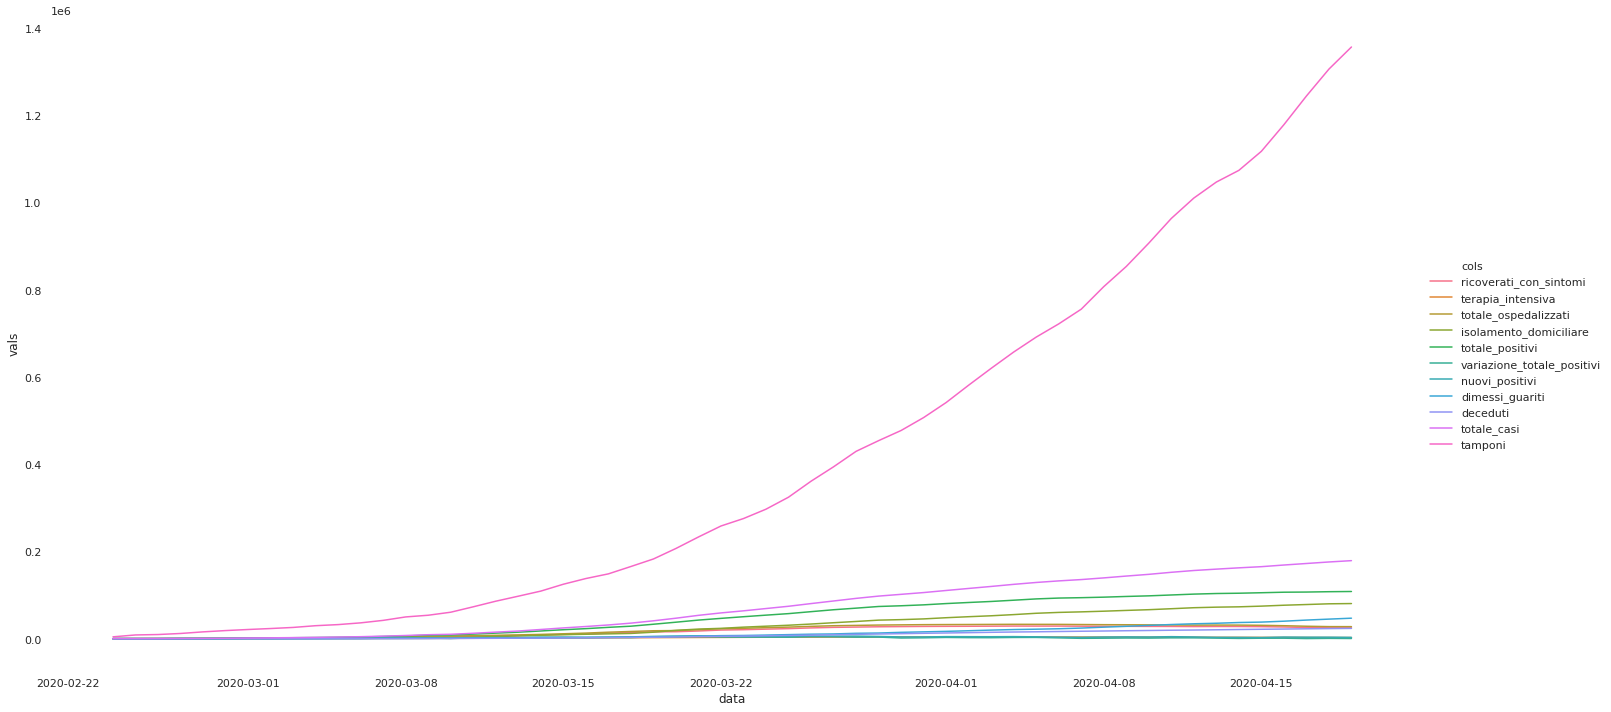

In [0]:
import io
import base64
buf = io.BytesIO() # in-memory files
fig_seaborn.savefig(buf, format = "png") # save to the above file object
data = base64.b64encode(buf.getbuffer()).decode("utf8") # encode to html elements
fig_seaborn_encoded =  "data:image/png;base64,{}".format(data)
print(fig_seaborn_encoded)

In [0]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from flask_ngrok import run_with_ngrok

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server
run_with_ngrok(server) 

write = '''
# Example 1
## Example 2
### Example 3
'''

app.layout = html.Div([
        dcc.Markdown(
            write,
            id='model-{}-markdown'.format(id)
        ),
        html.Div(
        [   
            html.Img(src='/assets/images/fig_static.png'),
        ]),
        html.Div(
        [   
            html.Img(src=fig_seaborn_encoded),
        ]),
        dcc.Graph(id="myid", figure=fig_plotly)

    ],style={'backgroundColor': "rgb(255,255,255)",  "margin": "0", "padding": "0"})

if __name__ == '__main__':
    server.run()
    #app.run_server() #debug=True, host="0.0.0.0", port=8900)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://50d3f668.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
